### **Saudi Arabia Used car**

[Saudi Arabia Used Car](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view?usp=drive_link)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Penjualan mobil bekas di Saudi Arabia dipengaruhi dengan kondisi ekonomi termasuk pertumbuhan GDP dan tingkat pengangguran, fluktuasi harga minyak yang signifikan sebagai produsen minyak terkemuka, kebijakan pemerintah terkait impor dan pajak, serta tren konsumen terkait preferensi merek dan jenis mobil. Data-data tersebut dapat digunakan untuk mengidentifikasi pola penjualan bulanan atau tahunan, distribusi geografis penjualan, dan preferensi konsumen yang dapat memberikan wawasan mendalam tentang dinamika pasar mobil bekas di negara tersebut.
Faktor-faktor ekonomi yang terkait dengan Arab Saudi sebagai salah satu produsen minyak terbesar di dunia memiliki dampak yang signifikan terhadap pasar mobil bekas di negara tersebut. Ketersediaan bahan bakar yang lebih murah di Arab Saudi karena produksi minyak yang melimpah mendorong tingginya penggunaan kendaraan, terutama mobil. Dampak langsungnya adalah peningkatan permintaan pasar terhadap mobil, khususnya mobil bekas. Dengan demikian, kondisi ekonomi dan faktor-faktor terkait dengan produksi minyak di Arab Saudi secara langsung berkontribusi pada dinamika pasar mobil bekas di negara tersebut.

Penentuan harga mobil bekas didasarkan pada berbagai spesifikasi mobil seperti tahun pembuatan (usia mobil), total jarak tempuh, merek, dan faktor lainnya. Ketersediaan beragam mobil bekas dengan spesifikasi yang berbeda-beda membuat penentuan harga yang optimal menjadi aspek penting yang harus dipertimbangkan. Menetapkan harga yang tepat untuk mobil bekas dapat menentukan kefektifan dan keefisienan proses jual beli bagi kedua belah pihak, baik penjual (Perusahaan A) maupun pembeli. Selain itu, penentuan harga ini berperan penting dalam menentukan tingkat keuntungan yang dapat diperoleh oleh penjual.

**Problem Statement**

Tingginya permintaan mobil bekas di Arab Saudi membuat Perusahaan A sulit dalam menetapkan harga yang sesuai. Dalam persaingan yang ketat, penentuan harga mobil bekas yang tepat menjadi kunci untuk menganalisis apakah harga tersebut terlalu tinggi atau terlalu rendah. Dengan beragam pilihan mobil dan spesifikasinya, Perusahaan A ingin memiliki model bisnis yang memungkinkan mereka menetapkan harga yang kompetitif agar menarik minat banyak pelanggan. Hal ini juga memastikan pengalaman pelanggan yang optimal dalam menemukan mobil sesuai dengan spesifikasi dan harga yang diinginkan. Dengan begitu Perusahaan A dapat meningkatkan jumlah pelanggan dan pendapatan yang maksimal.

**Goals**

Perusahaan A perlu mengembangkan tools yang dapat memprediksi harga mobil bekas agar dapat membantu pelanggan menemukan mobil sesuai keinginan mereka. Kriteria yang perlu dipertimbangkan termasuk merek, tipe, jenis transmisi, asal, tahun, jarak tempuh, dan ukuran mesin. Hal ini diharapkan memberikan harga yang kompetitif namun menguntungkan. Dengan machine learning, diharapkan prediksi harga menjadi lebih efisien, menghemat waktu dan biaya.

**Pendekatan Analisis**

Dalam pendekatan analisis ini, penting untuk melakukan proses analisis data guna mengidentifikasi pola dari berbagai fitur (kriteria) yang membedakan mobil satu dengan lainnya. Oleh karena itu, disini akan dikembangkan sebuah model regresi yang dapat membantu perusahaan dengan memiliki alat prediksi untuk harga mobil bekas dengan tingkat akurasi yang tinggi, yang akan berkontribusi pada peningkatan pendapatan perusahaan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE. Ketiga metrik evaluasi yaitu Root Mean Square Error (RMSE), Mean Absolute Error (MAE), dan Mean Absolute Percentage Error (MAPE) umumnya digunakan dalam model regresi penentuan harga mobil bekas untuk mengukur tingkat akurasi prediksi. RMSE memberikan informasi tentang tingkat kesalahan rata-rata dari prediksi terhadap nilai sebenarnya, MAE mengukur kesalahan rata-rata secara absolut, sedangkan MAPE mengukur kesalahan relatif sebagai persentase dari nilai aktual. Diantara ketiganya, MAE sering kali lebih disukai karena lebih mudah diinterpretasikan dan tidak sensitif terhadap nilai ekstrem, seperti yang dapat terjadi dalam kasus outliner pada harga mobil bekas. MAE juga memberikan informasi yang lebih intuitif tentang seberapa jauh prediksi berbeda dari nilai sebenarnya. Oleh karena itu, MAE dianggap paling relevan untuk digunakan dalam kasus penentuan harga mobil bekas.

**Library yang Digunakan**

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# MODEL
#Shallow:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings('ignore')

### **Data Understanding**

Dataset yang digunakan berisi 5624 catatan mobil bekas yang dikumpulkan dari syarah.com. Setiap baris mewakili mobil bekas. Informasi lain mengenai setiap mobil adalah nama merek, model, tahun pembuatan, asal, pilihan, kapasitas mesin, jenis transmisi, jarak tempuh yang ditempuh mobil, harga wilayah, dan nego.

**Attributes Information**

| **Feature** | **Description** |
| --- | --- |
| Type | Jenis mobil bekas
| Region | Wilayah tempat mobil bekas ditawarkan untuk dijual
| Make | Nama perusahaan
| Gear_Type | Ukuran jenis gigi mobil bekas
| Origin | Asal mobil bekas
| Options | Pilihan mobil bekas
| Year | Tahun pembuatan
| Engine_Size | Ukuran mesin mobil bekas
| Mileage | Jarak tempuh mobil bekas
| Negotiable | True, kalau harga 0 berarti bisa nego
| Price | Harga mobil bekas (dalam Riyal)

<br>

#### **Exploratory Data Analysis dan Cleaning**

In [2]:
# Load dataset
df = pd.read_csv("C:/.GRETTY/GERMANY/1. Sustainable Resource Managment/Semester 4/0. DS and ML/4. Capston Project/Capstone Project Module 3/data_saudi_used_cars.csv")
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Karena feature 'price' yang akan digunakan untuk memprediksi harga mobil bekas, maka data yang digunakan hanya data yang memiliki harga (non-negotiable), selebihnya data akan dihapus.

In [4]:
df.drop(df[df['Price'] < 1].index, inplace=True)

Berdasarkan [referensi](https://ksa.yallamotor.com/used-cars/search), harga mobil bekas terendah di tahun 2024 sekitar 5.000 SAR. Sumber ini menajdi acuan untuk menindak lanjuti anomali harga mobil bekas dan dapat dijadikan acuan dalam melakukan pembatasan harga terendah pada data set ini.

In [5]:
df = df[df['Price'] >= 5000]

Kemudian kolom 'Negotiable' dihapus karena tidak dibutuhkan dalam memprediksi harga mobil bekas

In [6]:
df = df.drop('Negotiable', axis=1)

In [7]:
display(df.describe(), df.describe(include='O'))

,Year,Engine_Size,Mileage,Price
count,3759.000000,3759.000000,3.759000e+03,3759.000000
mean,2014.803671,3.186619,1.438802e+05,79373.855547
std,5.092991,1.460392,3.813905e+05,72649.177371
min,1963.000000,1.000000,1.000000e+02,5000.000000
25%,2013.000000,2.000000,4.900000e+04,36000.000000
50%,2016.000000,2.700000,1.041590e+05,58500.000000
75%,2018.000000,4.000000,1.840000e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options
count,3759,3759,3759,3759,3759,3759
unique,318,27,56,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,147,1600,877,3361,2837,1455


Memeriksa dan Menghapus Duplikasi

In [8]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000


In [9]:
df = df.drop_duplicates()

#### **EDA & Feature Selection**

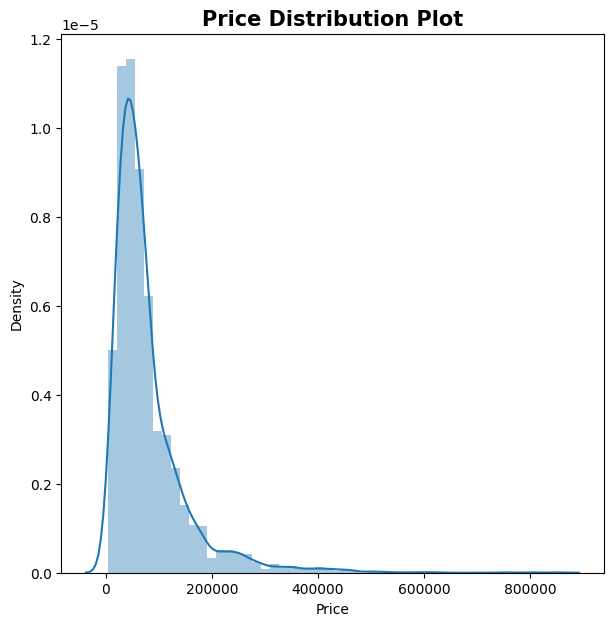

In [10]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Melihat rata-rata harga mobil berdasarkan mereknya, untuk nantinya dapat ditentukan encoding apa yang sesuai untuk Merek (Make)

In [11]:
# Ambil data rata-rata harga setiap merek mobil
make_vs_price = df.groupby('Make')['Price'].mean().sort_values(ascending=False)

Text(0.5, 1.0, ' Harga Mobil terhadap Merek Mobil')

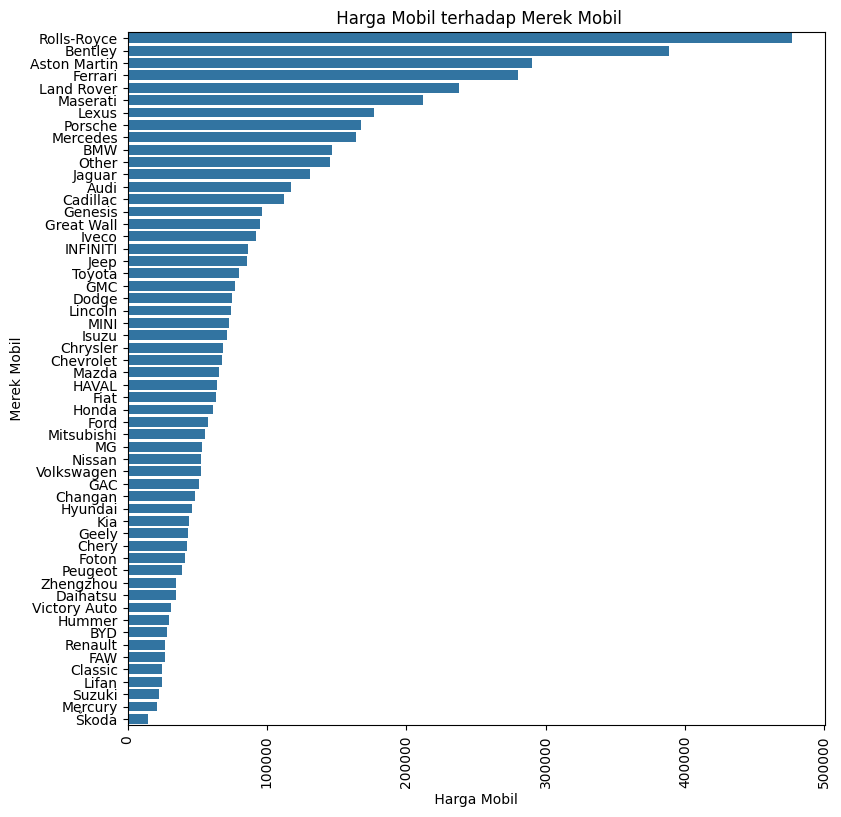

In [12]:
plt.figure(figsize=(9, 9))
sns.barplot(x=make_vs_price.values,y=make_vs_price.index)
plt.xticks(rotation=90);
plt.xlabel(' Harga Mobil ')
plt.ylabel(' Merek Mobil ')
plt.title(' Harga Mobil terhadap Merek Mobil')

In [13]:
# Ambil data rata-rata harga setiap merek mobil
make_vs_price = df.groupby('Make')['Price'].transform('mean')

# Tambahkan kolom baru 'harga rata-rata' ke DataFrame 
df['harga rata-rata'] = make_vs_price

df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,harga rata-rata
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000,77117.272727
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000,237798.387097
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000,43861.731844
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000,65901.098901
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000,167533.333333
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000,65901.098901
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000,77117.272727
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000,53017.928287
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000,77117.272727


Melihat bagaimana feature Gear_Type, Origin dan Options dengan target untuk menentukan encoding yang sesuai nantinya

In [14]:
# Cek jumlah mobil berdasarkan Gear_type, origin, dan option
print(f"Jumlah mobil berdasarkan Gear_Type:\n{df['Gear_Type'].value_counts()}")
print(f"\nJumlah mobil berdasarkan Origin:\n{df['Origin'].value_counts()}")
print(f"\nJumlah mobil berdasarkan Options:\n{df['Options'].value_counts()}")

Jumlah mobil berdasarkan Gear_Type:
Gear_Type
Automatic    3358
Manual        398
Name: count, dtype: int64

Jumlah mobil berdasarkan Origin:
Origin
Saudi          2834
Gulf Arabic     491
Other           415
Unknown          16
Name: count, dtype: int64

Jumlah mobil berdasarkan Options:
Options
Full         1455
Standard     1299
Semi Full    1002
Name: count, dtype: int64


In [15]:
# Grouping tipe properti berdasarkan Gear_type
df.groupby(['Gear_Type', 'Options'])['Options'].count()

Gear_Type  Options  
Automatic  Full         1336
           Semi Full     907
           Standard     1115
Manual     Full          119
           Semi Full      95
           Standard      184
Name: Options, dtype: int64

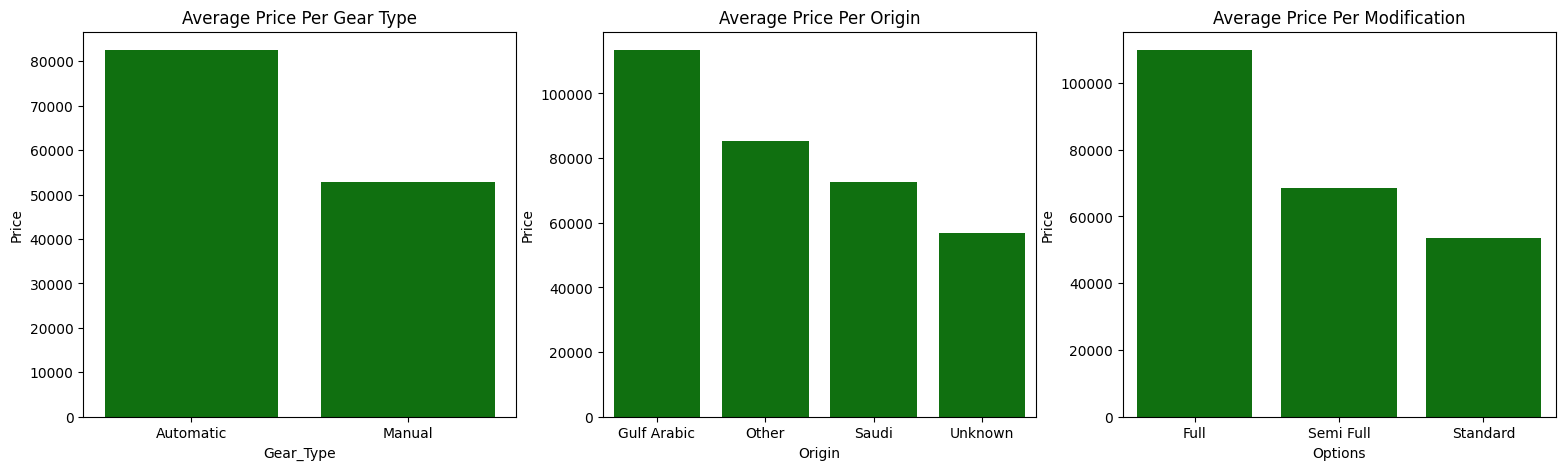

In [16]:
geartype_avgpr = df.groupby('Gear_Type')[['Price']].mean().sort_values(by = 'Price', ascending= False )
origin_avgpr = df.groupby('Origin')[['Price']].mean().sort_values(by = 'Price', ascending= False )
options_avgpr = df.groupby('Options')[['Price']].mean().sort_values(by = 'Price', ascending= False )

plt.figure(figsize=(19,5))

plt.subplot(1,3,1)
sns.barplot(geartype_avgpr['Price'],color= 'green')
plt.title('Average Price Per Gear Type')

plt.subplot(1,3,2)
sns.barplot(origin_avgpr['Price'],color= 'green')
plt.title('Average Price Per Origin')

plt.subplot(1,3,3)
sns.barplot(options_avgpr['Price'],color= 'green')
plt.title('Average Price Per Modification')

plt.show()

- Rata-rata harga mobil bekas bertransmisi otomatis lebih tinggi daripada mobil bekas bertransmisi manual. 
- Rata-rata harga mobil bekas asal Gulf Arabic lebih tinggi daripada yang lain.
- Rata-rata harga mobil bekas dengan full modifikasi lebih tinggi daripada mobil bekas dengan modifikasi semi full atau standard. 

In [17]:
# Hitung umur mobil dengan mengurangi tahun saat ini dari tahun pembuatan
df['age'] = 2024 - df['Year']
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,harga rata-rata,age
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000,77117.272727,10
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000,237798.387097,9
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000,43861.731844,9
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000,65901.098901,5
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000,167533.333333,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000,65901.098901,4
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000,77117.272727,18
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000,53017.928287,6
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000,77117.272727,8


Melihat sebaran data numerikal dan mengatasi outlier-nya 

In [18]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns][:-1]
num_feature

['Year', 'Engine_Size', 'Mileage', 'Price', 'harga rata-rata']

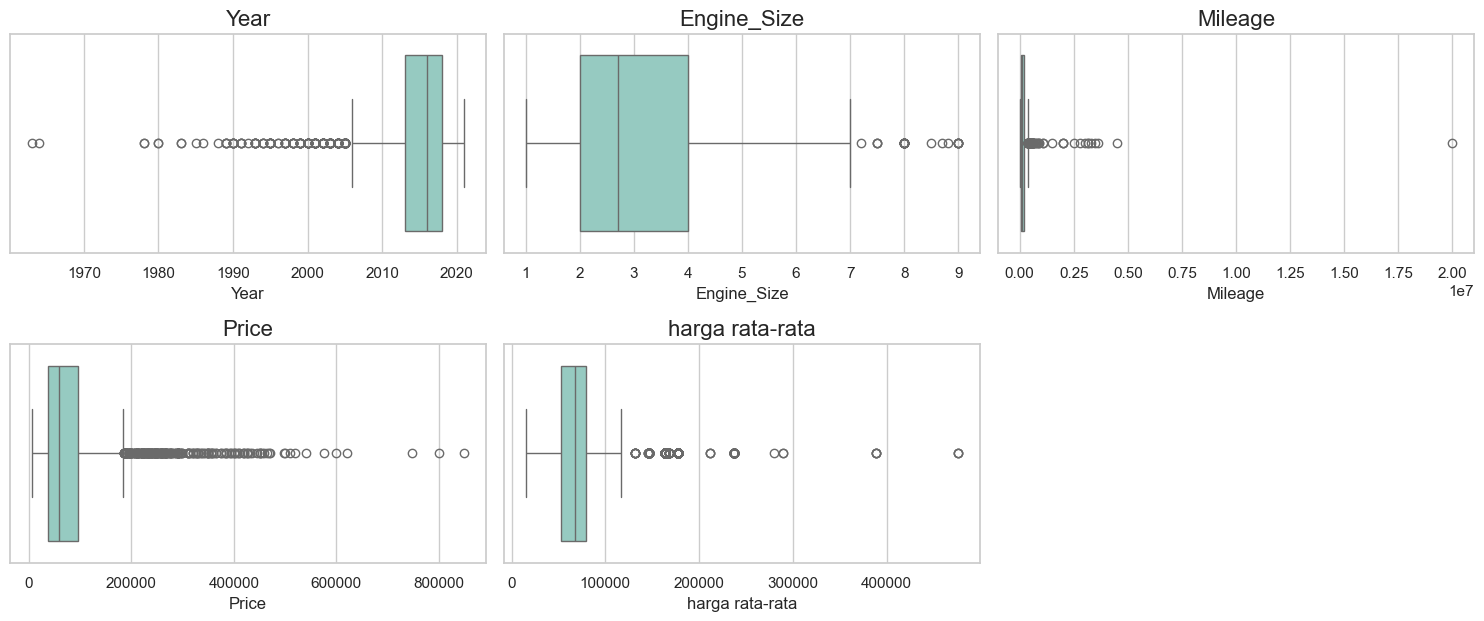

In [19]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

Berdasarkan https://www.dmv.virginia.gov/ maksimal dari odometer (jarak tempuh suatu kendaraan) adalah 999.999. Jadi dapat diasumsikan jika mobil dengan mileage lebih dari 999.999, bisa dilakukan treatment drop kolom/feature.

In [56]:
df = df.drop(df[df['Mileage'] > 999999].index)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3740 entries, 1 to 5622
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             3740 non-null   object 
 1   Region           3740 non-null   object 
 2   Make             3740 non-null   object 
 3   Gear_Type        3740 non-null   object 
 4   Origin           3740 non-null   object 
 5   Options          3740 non-null   object 
 6   Year             3740 non-null   int64  
 7   Engine_Size      3740 non-null   float64
 8   Mileage          3740 non-null   int64  
 9   Price            3740 non-null   int64  
 10  harga rata-rata  3740 non-null   float64
 11  age              3740 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 379.8+ KB


Setelah ini tidak dilakukan penghapusan data lagi menggunakan batas atas dan batas bawah IQR, karena saat ini jumlah data tersisa sebanyak 3740 dari sebelum 5624. 

In [21]:
#  Gak Perlu
# cat_features = ['Options', 'Gear_Type', 'Origin']

# # Menentukan ukuran plot
# plt.figure(figsize=(15, 5))

# # Iterasi melalui fitur kategorikal dan membuat plot bar untuk setiap fitur
# for i, feature in enumerate(cat_features, 1):
#     plt.subplot(1, 3, i)
#     sns.countplot(x=feature, data=df)
#     plt.title(feature, fontsize=16)
#     plt.xlabel('')
#     plt.ylabel('Count')

# # Menyusun plot secara rapi
# plt.tight_layout()

# # Menampilkan plot
# plt.show()

In [22]:
# Gak Perlu
#Comparing price & mileage based on Gear_Type
#sns.jointplot(data=df,x='Price',y='Mileage',hue='Gear_Type',kind='hist')

<Axes: >

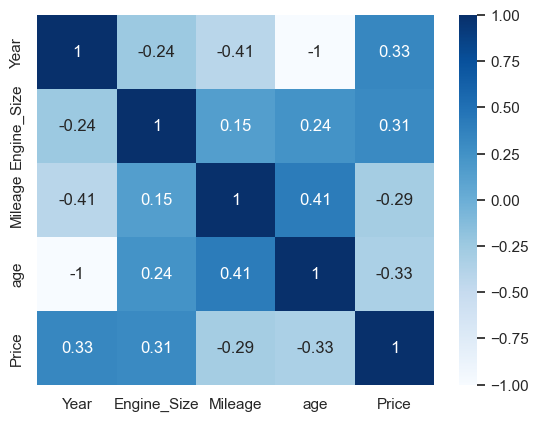

In [53]:
#Melihat hubungan antar data menggunakan Heatmap untuk kolom 'Year', 'Engine_Size', 'Mileage', dan 'Price'
subset_df = df[['Year', 'Engine_Size', 'Mileage', 'age', 'Price']]
corr_matrix = subset_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

Berdasarkan Heatmap, korelasi tiap numerikal feature terhadap Price tidak begitu kuat/tinggi. Nilai korelasi paling tinggi yaitu terkait tahun mobil/umurnya, dimana semakin baru mobilnya atau semakin muda umur mobilnya maka harganya semakin mahal.

### **Data Pre-processing**
#### **Feature Engineering**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn. preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Muticolinearitas 

Multicollinearity adalah fenomena di mana dua atau lebih variabel independen dalam model regresi memiliki hubungan kuat antara satu sama lain. Dalam konteks model regresi, multicollinearity dapat mengakibatkan masalah dalam mengestimasi koefisien regresi dengan akurasi yang baik, serta menyulitkan interpretasi hasil model. Variance Inflation Factor (VIF) adalah metode yang digunakan untuk mengukur seberapa kuat multicollinearity hadir dalam model regresi. VIF mengukur seberapa banyak varians dari koefisien regresi untuk satu variabel independen dapat dijelaskan oleh variabel independen lain dalam model. Semakin tinggi nilai VIF suatu variabel, semakin tinggi kemungkinan adanya multicollinearity dengan variabel lain. Umumnya, nilai VIF di atas 10 dianggap sebagai tanda adanya multicollinearity yang signifikan, dan dapat menyebabkan masalah dalam analisis regresi.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(df[['Year','Engine_Size','Mileage','Price']])

,variables,VIF
0,Year,7.096945
1,Engine_Size,6.820956
2,Mileage,2.747905
3,Price,2.795582


#### Data Splitting

In [26]:
# Memisahkan data independen variabel dengan target
x = df.drop(columns = 'Price') #Features
y = df['Price'] #Label

#### Train dan Test Splitting

In [27]:
# Splitt x train dan x test 
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2992, 11)
(2992,)
(748, 11)
(748,)


#### Encoding dan Scaling
Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya.
Bedasarkan nilai EDA sebelumnya, terlihat Gear_Type, Options, dan Make menentukan harga mobil, sehingga Gear_Type, Options, dan Make menggunakan Ordinal. Untuk Type dan Region menggunakan Binary.


In [28]:
# Membuat objek transformer 

transformer = ColumnTransformer(transformers =[
    ('Ordinal', OrdinalEncoder(), ['Gear_Type', 'Options', 'Origin']),
    ('BinaryEncoder',ce.BinaryEncoder(),['Type','Region','Make']),
    ('Scalling', RobustScaler(), x.select_dtypes('number').columns)
],remainder= 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Ordinal', OrdinalEncoder(),
                                 ['Gear_Type', 'Options', 'Origin']),
                                ('BinaryEncoder', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('Scalling', RobustScaler(),
                                 Index(['Year', 'Engine_Size', 'Mileage', 'harga rata-rata', 'age'], dtype='object'))])

#### Scaling the data

Ini adalah salah satu teknik yang umum digunakan dalam praproses data sebelum membangun model pembelajaran mesin. Berikut adalah penjelasan langkah-langkahnya:

1. **scaler** = StandardScaler(): Ini membuat objek StandardScaler, yang akan digunakan untuk mengubah skala data.
1. **scaler.fit(X)**: Dalam langkah ini, objek StandardScaler belajar tentang statistik data yang diberikan, X, yaitu mean (rata-rata) dan standar deviasi (deviasi standar). Ini dilakukan dengan memeriksa setiap fitur (kolom) dalam X dan menghitung rata-rata serta standar deviasi dari setiap fitur.
1. **X = scaler.transform(X)**: Ini menggunakan informasi yang dipelajari oleh objek StandardScaler (mean dan standar deviasi) untuk mentransformasi data. Setiap nilai dalam setiap fitur akan dikurangi dengan rata-rata dari fitur tersebut, dan kemudian dibagi dengan standar deviasi fitur tersebut. Ini menghasilkan data yang memiliki rata-rata nol dan standar deviasi satu untuk setiap fitur, yang dikenal sebagai standarisasi atau normalisasi.
Dengan langkah-langkah ini, kita memastikan bahwa semua fitur dalam data memiliki skala yang serupa, yang dapat membantu algoritma pembelajaran mesin seperti regresi, SVM, dan neural networks untuk konvergensi lebih cepat dan menghasilkan model yang lebih baik. Standarisasi atau normalisasi juga berguna untuk menghindari bahwa fitur dengan rentang nilai yang lebih besar mendominasi pengaruh dalam proses pembelajaran.

In [29]:
# #Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

### **Training Models**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Model ini menggunakan benchmarking untuk membandingkan performa model dengan menggunakan penilaian RMSE, MAE, dan MAPE. Meskipun ketiga metrik evaluasi ini digunakan, fokus utama adalah pada RMSE, sesuai dengan konteks bisnis yang mengutamakan akurasi prediksi model.

1. RMSE adalah metode pengukuran yang membandingkan perbedaan nilai prediksi model dengan nilai yang diamati. Tingkat akurasi diukur dengan kecilnya nilai RMSE. Sebuah nilai RMSE yang kecil diharapkan dapat menghasilkan prediksi harga mobil yang akurat, dengan kesalahan prediksi yang sangat kecil.

2. MAE, di sisi lain, adalah rata-rata dari selisih absolut antara nilai sebenarnya dan nilai prediksi. Semakin kecil nilai MAE, semakin baik model dalam melakukan prediksi. Tujuannya adalah untuk mendapatkan nilai MAE yang kecil agar model dapat memprediksi harga mobil dengan baik, dengan kesalahan mutlak yang minimal.

3. MAPE mengukur persentase kesalahan mutlak relatif terhadap rentang nilai. Semakin kecil nilai persentase kesalahan pada MAPE, semakin akurat prediksi tersebut. Dengan mendapatkan nilai MAPE yang kecil, diharapkan model dapat memprediksi harga mobil dengan baik, dengan persentase kesalahan yang sangat kecil.

Dari lima model yang dibandingkan - **Linear Regression, KNN, Decision Tree dan Random Forest** - akan dipilih dua model terbaik berdasarkan nilai RMSE, MAE, dan MAPE yang kecil, serta standar deviasi yang kecil dari ketiga metrik tersebut.
Selain membandingkan model, juga akan dibandingkan metode scaling yang dapat memberikan kinerja terbaik pada ketiga metrik tersebut. Metode scaling yang akan dibandingkan meliputi **Standard Scaler, Min Max Scaler, dan Robust Scaler**.

**Note**

Pengecekan pada asumsi-asumsi untuk dapat menggunakan LinearRegressor belum dilakukan karena ini melihat hasil dari tiap matriksnya, jika LinearRegressor adalah salah satu yang terbaik, lalu akan dilakukan pemeriksaan terhadap asumsi/persyaratan penggunaannya, jika tidak, maka akan diabaikan saja, karena tidak ada dipilih untuk digunakan lebih lanjut.

#### Pilih model Benchmark

In [31]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Funsi Model Cross Validation
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        #('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    #print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(-model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    #print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(-model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    #print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(-model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

#nilai mean tiap matriks dinegasi

**Note for me**

Pemodelan dalam skala logaritmik digunakan dalam beberapa konteks:

1. **Peningkatan interpretasi**: Data yang tidak terdistribusi normal atau sangat bervariasi dapat sulit diinterpretasikan. Mengubahnya ke skala logaritmik dapat membuat distribusi data menjadi lebih simetris dan lebih mudah diinterpretasikan.

2. **Stabilisasi varian**: Dalam beberapa kasus, data memiliki varian yang tidak stabil atau heteroskedastis. Pemodelan dalam skala logaritmik dapat membantu mengurangi variabilitas data ini.

3. **Persamaan linierisasi**: Pemodelan dalam skala logaritmik sering kali membuat hubungan antara variabel menjadi lebih linier. Ini dapat memudahkan pemodelan regresi karena asumsi dasar model regresi adalah hubungan linier antara variabel independen dan dependen.

Namun, setelah proses pemodelan selesai, seringkali kita ingin menginterpretasikan hasil dalam skala yang dimengerti oleh orang awam. Oleh karena itu, diambil hasil yang telah diprediksi dalam skala logaritmik ke dalam skala aslinya. Ini memungkinkan untuk memberikan estimasi atau hasil prediksi dalam unit yang mudah dipahami dan berguna dalam konteks nyata.

In [32]:
# Agar dapa mengevaluasi hasil dari 5 kandidat algoritma yang digunakan, hasilnya dibuat dalam DataFrame
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,40359.983067,6474.260369,21706.711963,1096.515279,0.316297,0.016625
1,KNN Regressor,32442.356444,4370.097863,17535.778275,1729.077582,0.276321,0.031832
2,DecisionTree Regressor,38609.775042,3586.352098,20085.772743,1495.379884,0.308142,0.027733
3,RandomForest Regressor,27061.399657,3649.163516,14185.827716,1203.283043,0.212608,0.033359
4,XGBoost Regressor,26823.114541,3604.046900,14058.088628,944.488997,0.207465,0.025671


Standar deviasi yang lebih rendah menunjukkan konsistensi yang lebih baik dalam kinerja model dan semakin stabil performa model dalam melakukan prediksi.

- Berdasarkan nilai mean matriks  terendah dan juga pempertimbangkan stabilan/konsistensi melalui nilai standar deviasi tipa matriks, 'RandomForest' dan 'XGBoost' adalah model yang terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForest dan DecisionTree.
- sebelumnya menentukan model terbaik antara Standard Scaler, MinMax Scaler, dan Robust Scaler dengan menggunakan Grid Search

#### Memprediksi Set Data Test dengan Benchmark Model Terpilih

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

GridSearch digunakan untuk mengoptimasi hyperparameter-nya. Teknik ini dipilih mengingat data yang diolah tidak terlalu banyak.
Parameter disini ditentukan berdasarkan 2 model terbaik yang sudah ditentukan sebelumnya dan 3 scaler pilihan yakni Minmax, Standard, dan, Robust Scaler.

In [33]:
models = [rf, xgb]

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', None)
        ])

param_space = {
    'model' : models,
    'preprocessing__Scalling' : [MinMaxScaler(),RobustScaler(),StandardScaler()]
}

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
gridsearch_scaler = GridSearchCV(
    estimator = estimator,
    param_grid = param_space,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    return_train_score= True
)

gridsearch_scaler.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Gear_Type',
                                                                          'Options',
                                                                          'Origin']),
                                                                        ('BinaryEncoder',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('Scalling',
                                                                         RobustScaler(),
                                                                         Index(['Year', 'Engine_Size', 'Mileage', 'ha...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=1, ...)],
                         'preprocessing__Scalling': [MinMaxScaler(),
                                                     RobustScaler(),
                                                     StandardScaler()]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [34]:
print('Best Params :',gridsearch_scaler.best_params_)
print('Best Score :',gridsearch_scaler.best_score_)

Best Params : {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...), 'preprocessing__Scalling': MinMaxScaler()}
Best Score : -27231.31669322609


In [35]:
result = pd.DataFrame(gridsearch_scaler.cv_results_)[['param_model','param_preprocessing__Scalling','rank_test_neg_root_mean_squared_error','mean_test_neg_root_mean_squared_error','std_test_neg_root_mean_squared_error',\
    'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error',
       'std_test_neg_mean_absolute_percentage_error']].sort_values('rank_test_neg_root_mean_squared_error').head(15)
result

,param_model,param_preprocessing__Scalling,rank_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error
3,"XGBRegressor(base_score=None, booster=None, ca...",MinMaxScaler(),1,-27231.316693,3126.359031,-14852.882551,944.992718,-0.240358,0.027590
4,"XGBRegressor(base_score=None, booster=None, ca...",RobustScaler(),1,-27231.316693,3126.359031,-14852.882551,944.992718,-0.240358,0.027590
5,"XGBRegressor(base_score=None, booster=None, ca...",StandardScaler(),1,-27231.316693,3126.359031,-14852.882551,944.992718,-0.240358,0.027590
1,RandomForestRegressor(random_state=1),RobustScaler(),4,-27317.537396,3236.695715,-14696.054773,1035.445326,-0.242329,0.032614
0,RandomForestRegressor(random_state=1),MinMaxScaler(),5,-27323.808921,3255.312126,-14683.901131,1027.742088,-0.242344,0.032674
2,RandomForestRegressor(random_state=1),StandardScaler(),6,-27331.273014,3249.261456,-14703.442976,1025.635134,-0.242370,0.032539


Pemahaman tabel :
 
Nilai-nilai Mean_RMSE, Mean_MAE, dan Mean_MAPE yang lebih rendah mengindikasikan performa model yang lebih baik, sementara nilai-nilai Std_RMSE, Std_MAE, dan Std_MAPE yang lebih rendah menunjukkan stabilitas performa model yang lebih tinggi. Berdasarkan hasil eksperimen membandingkan metode scaler sebelumnya antara Standard, MinMax, dan Robust Scaler, dapat disimpulkan bahwa metode MinMax Scaler memberikan nilai rata-rata RMSE, MAE, dan MAPE yang paling baik. Namun, perlu diperhatikan bahwa ketika melihat deviasi standar dari RMSE, MAE, dan MAPE, terutama untuk ketiga scaler, XGBoost menunjukkan stabilitas model yang lebih tinggi.

Berdasarkan analisis RMSE, MAE, dan MAPE serta penggunaan metode scaler MinMax, Robust, dan Standard, XGBoost terbukti menjadi model ML yang paling baik, meskipun telah mengalami proses feature engineering dengan mengubah metode scaling. Model berikutnya dalam urutan adalah Random Forest dengan penggunaan Standard Scaler. Model XGBoost ini akan dilanjutkan untuk tahap prediksi harga (`Price`) berdasarkan fitur-fitur yang telah ditentukan sebelumnya.

#### Model Terpilih : XGBoost (Sebelum Tunning) 

In [36]:
# Model XGBoost
model = {'XGBRegressor Test': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = gridsearch_scaler.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_beforetune = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_beforetune))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_beforetune)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_beforetune)

score_before_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGBRegressor Test,35358.814956,15493.089081,0.237252


Dari hasil yang tercantum di atas, terlihat bahwa prediksi terbaik sebelum penyetelan pada model XGBoost untuk memprediksi `Price` dapat dilihat dari nilai-nilai RMSE, MAE, dan MAPE-nya. Oleh karena itu, kesimpulan yang dapat diambil di sini adalah bahwa model XGBoost akan disetel lebih lanjut untuk meningkatkan kinerja dalam memprediksi harga mobil bekas sesuai dengan konteks bisnis yang telah ditetapkan.

#### Hyperparameter Tuning

Karena model XGBoost memiliki performa yang  lebih baik dari model-model lainnya, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [37]:
estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', None)
        ])

param_space_xgb = {
    'model' : [XGBRegressor(random_state = 1)], 
    'model__learning_rate': [0.01,0.1], # memberi perubahan pada leraning rate 
    'model__n_estimators' : [100],
    'model__max_depth': [5,6,7], #memberi perubahan pada max depth
    'model__min_child_weight': [1,3,5], 
    'model__gamma' : [0.01,0.2],
    'model__subsample' : [0.8,1],
    'model__colsample_bytree': [0.8,1],
    'preprocessing__Scalling' : [MinMaxScaler(),RobustScaler(),StandardScaler()]
}

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
best_xgb = GridSearchCV(
    estimator = estimator,
    param_grid = param_space_xgb,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    return_train_score= True
)

Penentuan skala *learning_rate, n_estimators, max_depth, min_child_weight, gamma, subsample, dan colsample_bytree* berdasarkan referensi berikut: https://xgboost.readthedocs.io/en/stable/parameter.html

In [38]:
best_xgb.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Gear_Type',
                                                                          'Options',
                                                                          'Origin']),
                                                                        ('BinaryEncoder',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('Scalling',
                                                                         RobustScaler(),
                                                                         Index(['Year', 'Engine_Size', 'Mileage', 'ha...
                         'model__max_depth': [5, 6, 7],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100],
                         'model__subsample': [0.8, 1],
                         'preprocessing__Scalling': [MinMaxScaler(),
                                                     RobustScaler(),
                                                     StandardScaler()]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [39]:
print('Best Params:',best_xgb.best_params_)
print("")
print('Best score:', best_xgb.best_score_)

Best Params: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...), 'model__colsample_bytree': 1, 'model__gamma': 0.01, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_child_weight': 5, 'model__n_estimators': 100, 'model__subsample': 0.8, 'preprocessing__Scalling': MinMaxScaler()}

B

In [40]:
pd.DataFrame(best_xgb.cv_results_)[['param_model','param_preprocessing__Scalling','rank_test_neg_root_mean_squared_error','mean_test_neg_root_mean_squared_error','std_test_neg_root_mean_squared_error',\
    'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error',
       'std_test_neg_mean_absolute_percentage_error']].sort_values('rank_test_neg_root_mean_squared_error').head(1)

,param_model,param_preprocessing__Scalling,rank_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error
318,"XGBRegressor(base_score=None, booster=None, ca...",MinMaxScaler(),1,-25439.082717,2971.089009,-13945.896818,863.798973,-0.224566,0.025706


Dari hasil melakukan beberapa kali experiment dapat ditarik kesimpulan jika best parameter setelah melakukan tuning model XGboost dengan Gridsearch adalah sebagai berikut : 

1. colsample_bytree : 1
2. gamma : 0.01 
3. learning_rate : 0.1 
4. max_depth : 7
5. min_child_weight : 5 
6. n_estimators : 100 
7. subsample : 0.8
8. preprocessing__Scalling: MinMaxScaler

Score terbaik pada Tuningan model XGBoost disini adalah `-25439.082717200603` secara RMSE<br>

#### Model Terpilih : XGBoost (Sesudah Tunning) 

In [41]:
# Model XGBoost
model = {'XGBRegressor': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = best_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBRegressor,33523.513942,14680.31221,0.22766


#### Performance Comparison

Perbandingan performa model KNN sebelum dan sesudah dilakukan hyperparameter tuning.

In [42]:
# DataFrame sebelum hyperparameter tuning
score_before_tuning_df = pd.DataFrame(score_before_tuning.loc['XGBRegressor Test']).T

# DataFrame setelah hyperparameter tuning
score_after_tuning_df = score_after_tuning

merged_df = pd.concat([score_before_tuning_df, score_after_tuning_df], ignore_index=True)
merged_df.index = ['XGB Sebelum Tuning', 'XGB Setelah Tuning']
merged_df


,RMSE,MAE,MAPE
XGB Sebelum Tuning,35358.814956,15493.089081,0.237252
XGB Setelah Tuning,33523.513942,14680.312210,0.227660


Model mengalami peningkatan performa, seperti terlihat pada tabel diatas, terhadap semua matriks setelah dilakukannya hyperparameter tuning.

#### Hasil Prediksi Terhadap Data Aktual
Sekarang kita melihat bagaimana scatter plot menunjukan harga mobil bekas aktual dan prediksi dengan menggunakan model XGboost 

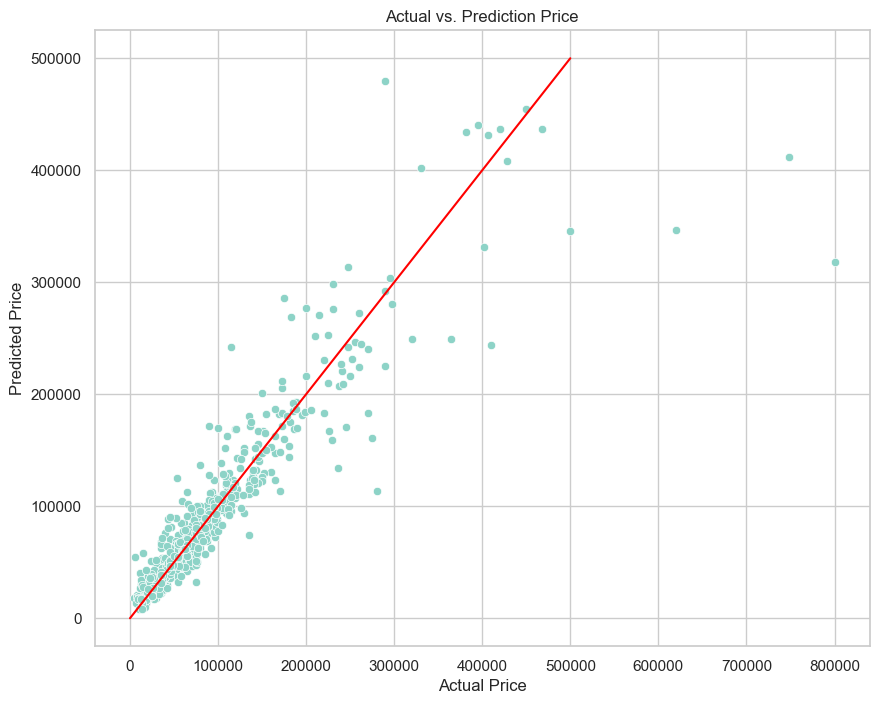

In [43]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');
sns.lineplot(x=list(np.arange(0,500000)), y=list(np.arange(0,500000)), color='red')
plt.show()

In [44]:
residual = pd.DataFrame({'Actual' : y_test,
              'Prediction Price' :y_pred_xgb_tuning})
residual['Residual'] = residual['Prediction Price'] - residual['Actual']

residual['type_est'] = np.where(residual['Residual']< 0, 'Underprice', 'Oveprice')
residual

,Actual,Prediction Price,Residual,type_est
1877,41000,35530.281250,-5469.718750,Underprice
2275,14000,31430.113281,17430.113281,Oveprice
1570,140000,126782.273438,-13217.726562,Underprice
2767,63000,77505.187500,14505.187500,Oveprice
1064,24000,27199.697266,3199.697266,Oveprice
...,...,...,...,...
2089,23000,36007.671875,13007.671875,Oveprice
1918,45000,90120.937500,45120.937500,Oveprice
233,330000,401928.468750,71928.468750,Oveprice
5598,45000,46217.777344,1217.777344,Oveprice


Melihat keseluruhan hasil prediksi harga mobil bekas terhadap harga aktualnya.

In [45]:
print(f"Harga yang diprediksi lebih dari nilai aktual (Harga Overprice): {len(residual[residual['Residual'] > 0])}")
print(f"Harga yang diprediksi kurang dari nilai aktual (Harga Underprice) : {len(residual[residual['Residual'] < 0])}")
print(f"Prediksi Overprice tertinggi adalah : {residual[residual['Residual'] > 0]['Residual'].max()}")
print(f"Prediksi Underprice terendah adalah : {residual[residual['Residual'] < 0]['Residual'].min()}")

Harga yang diprediksi lebih dari nilai aktual (Harga Overprice): 422
Harga yang diprediksi kurang dari nilai aktual (Harga Underprice) : 326
Prediksi Overprice tertinggi adalah : 189585.03125
Prediksi Underprice terendah adalah : -481780.8125


#### Feature Importance

Fungsi feature_importances_ digunakan untuk mengetahui tingkat pentingnya setiap fitur dalam mempengaruhi target variabel (dalam kasus ini, variabel "price"). Fitur yang memiliki kontribusi yang lebih tinggi dalam memprediksi target akan memiliki skor yang lebih tinggi. Fitur dengan skor yang tinggi menunjukkan bahwa fitur tersebut memiliki pengaruh yang signifikan terhadap target dan sebaliknya.

In [46]:
xgb_tuning['model'].feature_importances_

array([0.00640516, 0.03767872, 0.01352879, 0.0089033 , 0.03509421,
       0.01875205, 0.02951119, 0.02241624, 0.02622994, 0.01926294,
       0.03008828, 0.01291059, 0.00250701, 0.00858469, 0.00431285,
       0.02004166, 0.00984485, 0.01891542, 0.03527085, 0.03055069,
       0.01829784, 0.0318315 , 0.01704813, 0.17851326, 0.10062056,
       0.02003041, 0.24284896, 0.        ], dtype=float32)

In [47]:
best_xgb.best_estimator_.named_steps['preprocessing'].get_feature_names_out()

array(['Ordinal__Gear_Type', 'Ordinal__Options', 'Ordinal__Origin',
       'BinaryEncoder__Type_0', 'BinaryEncoder__Type_1',
       'BinaryEncoder__Type_2', 'BinaryEncoder__Type_3',
       'BinaryEncoder__Type_4', 'BinaryEncoder__Type_5',
       'BinaryEncoder__Type_6', 'BinaryEncoder__Type_7',
       'BinaryEncoder__Type_8', 'BinaryEncoder__Region_0',
       'BinaryEncoder__Region_1', 'BinaryEncoder__Region_2',
       'BinaryEncoder__Region_3', 'BinaryEncoder__Region_4',
       'BinaryEncoder__Make_0', 'BinaryEncoder__Make_1',
       'BinaryEncoder__Make_2', 'BinaryEncoder__Make_3',
       'BinaryEncoder__Make_4', 'BinaryEncoder__Make_5', 'Scalling__Year',
       'Scalling__Engine_Size', 'Scalling__Mileage',
       'Scalling__harga rata-rata', 'Scalling__age'], dtype=object)

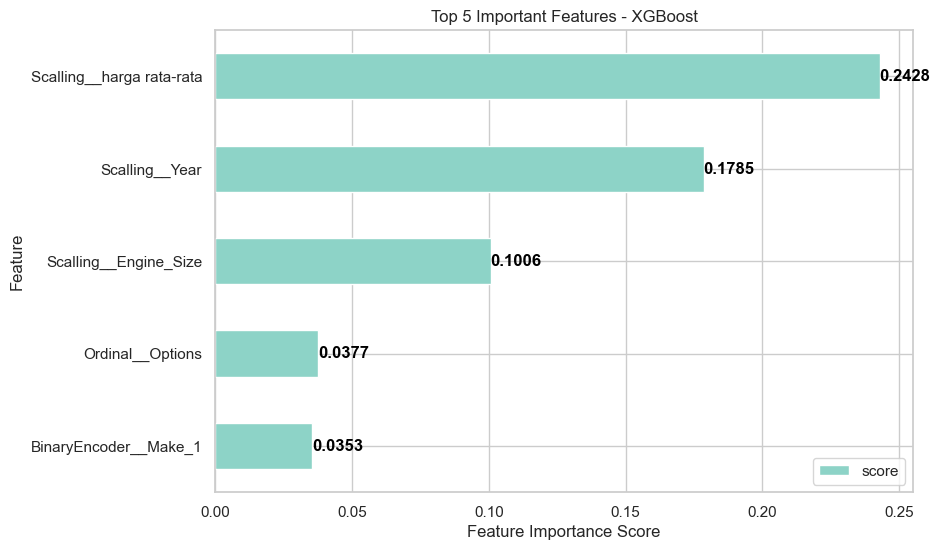

In [48]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = best_xgb.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
feature_imp['score'] = xgb_tuning['model'].feature_importances_
feature_imp = feature_imp.set_index('feature')


top_features = feature_imp.sort_values('score', ascending=True).tail(5)
top_features.plot(kind='barh', figsize=(9, 6))

# Adding values to the bars
for index, value in enumerate(top_features['score']):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', color='black', fontweight='bold')

plt.title('Top 5 Important Features - XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


jika dilihat dari barplot dan nilai diatas dapat diidentifikasi jika feature Harga Rata-rata, Year, Engine_Size, Option, dan Make merupakan feature penting yang paling mempengaruhi target `Price`.

Harga rata-rata merupakan feature baru yang ditambahkan untuk melihat harga rata-rata mobil bekas berdasarkan mereknya. Feature ini memiliki nilai importance **0,2428**, menunjukkan bahwa harga berdasarkan merek mobil merupakan faktor yang paling penting dalam memprediksi harga mobil bekas.
Feature ini kemudian diikuti oleh feature Year dan Engine Size dimana keduanya juga memiliki nilai yang cukup tinggi. Dimana hal ini menunjukkan bahwa tahun produksi mobil dan ukuran mesin merupakan faktor yang penting dalam memprediksi harga mobil bekas. Mobil yang lebih baru umumnya memiliki harga yang lebih tinggi daripada mobil yang lebih tua dan mobil dengan mesin yang lebih besar umumnya memiliki harga yang lebih tinggi.

 95%|=================== | 2839/2992 [00:16<00:00]       

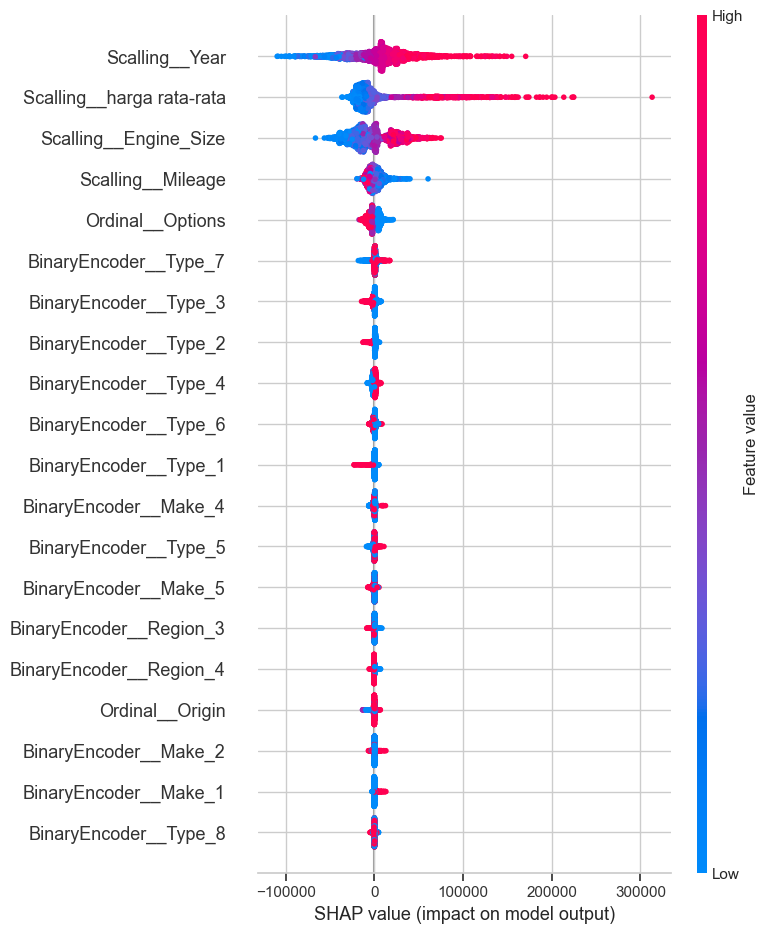

In [49]:
import shap
model_shap = xgb_tuning.named_steps['model']
prep = xgb_tuning.named_steps['preprocessing']
x_test_pre = prep.transform(x_train)
shap_values = shap.TreeExplainer(model_shap,
                                 data = x_test_pre,
                                 model_output="raw").shap_values(x_test_pre)
plt.figure
shap.summary_plot(shap_values, x_test_pre,feature_names = prep.get_feature_names_out())

### **Kesimpulan**

Berdasarkan pemodelan yang telah dilakukan, berikut adalah beberapa kesimpulan utama dari proyek ini:

1. **Model Terbaik**: Model XGBoost Regressor dengan hyperparameter tuning pada:
   1. colsample_bytree : 1
   2. gamma : 0.01 
   3. learning_rate : 0.1 
   4. max_depth : 7
   5. min_child_weight : 5 
   6. n_estimators : 100 
   7. subsample : 0.8
   8. preprocessing__Scalling: MinMaxScaler

      Score terbaik pada Tuningan model XGBoost disini adalah `-25439.082717200603` secara RMSE<br>

2. **Evaluasi Model**:
   - Prediksi model mungkin meleset lebih jauh karena adanya bias yang cukup tinggi, disebabkan oleh keterbatasan fitur (e.g tidak adanya kondisi mesin, garansi, dan status mobil klasik) dan beberapa data yang mungkin dianggap outlier namun tidak dibuang karena mempertimbangkan banyaknya data yang diperlukan (e.g. Harga mobil yang lebih dari 500.000 SAR)

3. **Limitasi dan Implikasi**: 
   - Model memiliki limitasi yang signifikan pada data testing baru. Data harus disesuaikan dengan batasan yang telah ditentukan agar prediksi dapat dipercaya.
   - Saat digunakan pada data yang tidak memenuhi batasan ini, hasil prediksi bisa kurang akurat.

4. **Analisis Residual**: Model memprediksi data sebagai overprice sebanyak 422 data dan underprice sebanyak 326 data. Hal ini berguna dalam menentukan strategi penjualan dan pembelian mobil bekas untuk mencari keuntungan. Namun model prediksi harga mobil bekas disini dapat dianggap memiliki akurasi yang cukup baik. Hal ini ditunjukkan dengan jumlah prediksi harga yang akurat (overprice atau underprice yang masih masuk akal) yang lebih banyak daripada jumlah prediksi harga yang tidak akurat.

5. **Fitur Tambahan dan Pengaruhnya**: 
   - Fitur tambahan seperti `harga rata-rata` sangat berpengaruh pada prediksi harga 
   - Bias model masih tinggi karena terbatasnya fitur yang mewakili variasi spesifikasi mobil bekas seperti Option dan Original

Dengan demikian, meskipun model saat ini sudah cukup baik, masih terdapat ruang untuk peningkatan akurasi dan pengurangan bias dengan menambahkan fitur yang lebih representatif.


### **Rekomendasi**

- Terkait dengan limitasi untuk dalam pemodelan ini, sebaiknya jumlah data diperbanyak menjadi lebih dari dari 5000an (jumlah data yang sudah dibersihkan), agar model dapat memprediksi harga lebih akurat dari banyaknya variasi data juga.

- Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti neural networks. 

- Penambahan feature untuk melengkapi informasi yang merepresentasikan variasi spesifikasi mobil seperti, apakah mobil memiliki garansi atau tidak, jenis mobil seperti mobil sport atau tidak, daln lainnya yang mempengarahui dalam menentukan harga mobil bekas. 

- Penggunaan model yang lain dengan target baru untuk  mengklasifikasikan apakah mobil yang terjual ini menguntungkan bagi perusahaan atau tidak. Model klasifikasi ini berguna bagi perusahaan untuk memotong cost servis mobil dengan kondisi sangat buruk, atau sebagai bahan pertimbangan mobil tetap diiklankan atau tidak (Marketing Analyst).

- Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

- Dengan menunjukkan harga mana saja yang overprice dan underprice akan lebih baik juga bagi perusahaan untuk memberikan pertimbangan khusus harga mana yang dirasa overprice atau underprice yang masuk akal, dengan begitu perusahaan akan mencapai keuntungan dan bagi pelanggan menemukan harga yang sesuai dengan kriteria atau spesifikasi mobilnya. 



### **Menyimpan Model**

In [50]:
import pickle
final_model = xgb_tuning.fit(x,y)
filename = 'Saudi_model_XGB_Best.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [51]:
model = pickle.load(open(filename,'rb'))

In [52]:
np.sqrt(mean_squared_error(y,model.predict(x)))

11985.827734768307